In [79]:
import pandas as pd

In [80]:
df = pd.read_csv('villas_web.csv')

In [81]:
df.head()

,Field1_links,nb_piece,nb_bains,superficie,adresse
0,https://sn.coinafrique.com/annonce/villas/vent...,3.0,6.0,150,"Pikine, Sénégal"
1,https://sn.coinafrique.com/annonce/villas/vent...,NaN,NaN,NaN,"Grand Yoff, Dakar, Sénégal"
2,https://sn.coinafrique.com/annonce/villas/vent...,6.0,12.0,240,"Guediawaye, Dakar, Sénégal"
3,https://sn.coinafrique.com/annonce/villas/loca...,3.0,6.0,150,"Mbao, Dakar, Sénégal"
4,https://sn.coinafrique.com/annonce/villas/loca...,9.0,18.0,300,"Saly, Sénégal"


In [82]:
df.describe()

,nb_piece,nb_bains
count,8.106000e+03,7.622000e+03
mean,1.216421e+04,2.587189e+04
std,5.922223e+05,1.221461e+06
min,0.000000e+00,0.000000e+00
25%,3.000000e+00,6.000000e+00
50%,6.000000e+00,1.200000e+01
75%,9.000000e+00,1.800000e+01
max,3.333333e+07,6.666667e+07


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9911 entries, 0 to 9910
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Field1_links  9911 non-null   object 
 1   nb_piece      8106 non-null   float64
 2   nb_bains      7622 non-null   float64
 3   superficie    6302 non-null   object 
 4   adresse       9820 non-null   object 
dtypes: float64(2), object(3)
memory usage: 387.3+ KB


In [84]:
df['superficie'] = (
    df['superficie']
    .str.strip()
    .str.replace('m2', '', regex=False)
    .str.replace(' ', '', regex=False)
)
df['superficie'] = df['superficie'].astype(float)

In [85]:
df.dtypes

Field1_links     object
nb_piece        float64
nb_bains        float64
superficie      float64
adresse          object
dtype: object

In [86]:
df['nb_piece']=df['nb_piece'].fillna(df['nb_piece'].mode()[0])

In [87]:
df['nb_bains']=df['nb_bains'].fillna(df['nb_bains'].mode()[0])

In [88]:
df['superficie']=df['superficie'].fillna(df['superficie'].mode()[0])

In [89]:
df.head(10)

,Field1_links,nb_piece,nb_bains,superficie,adresse
0,https://sn.coinafrique.com/annonce/villas/vent...,3.0,6.0,150.0,"Pikine, Sénégal"
1,https://sn.coinafrique.com/annonce/villas/vent...,6.0,12.0,150.0,"Grand Yoff, Dakar, Sénégal"
2,https://sn.coinafrique.com/annonce/villas/vent...,6.0,12.0,240.0,"Guediawaye, Dakar, Sénégal"
3,https://sn.coinafrique.com/annonce/villas/loca...,3.0,6.0,150.0,"Mbao, Dakar, Sénégal"
4,https://sn.coinafrique.com/annonce/villas/loca...,9.0,18.0,300.0,"Saly, Sénégal"
5,https://sn.coinafrique.com/annonce/villas/vent...,3.0,6.0,150.0,"Dakar, Sénégal"
6,https://sn.coinafrique.com/annonce/villas/loca...,6.0,12.0,150.0,"Sipres, Dakar, Sénégal"
7,https://sn.coinafrique.com/annonce/villas/vent...,6.0,12.0,150.0,"Diamniadio, Sénégal"
8,https://sn.coinafrique.com/annonce/villas/vent...,21.0,12.0,782.0,"Mermoz-Sacré Coeur, Dakar, Sénégal"
9,https://sn.coinafrique.com/annonce/villas/vent...,21.0,42.0,782.0,"Mermoz-Sacré Coeur, Dakar, Sénégal"


In [90]:
df.dropna(subset=['adresse'], inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9820 entries, 0 to 9831
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Field1_links  9820 non-null   object 
 1   nb_piece      9820 non-null   float64
 2   nb_bains      9820 non-null   float64
 3   superficie    9820 non-null   float64
 4   adresse       9820 non-null   object 
dtypes: float64(3), object(2)
memory usage: 460.3+ KB


In [92]:
val_num=df.select_dtypes(include=['float64']).columns

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

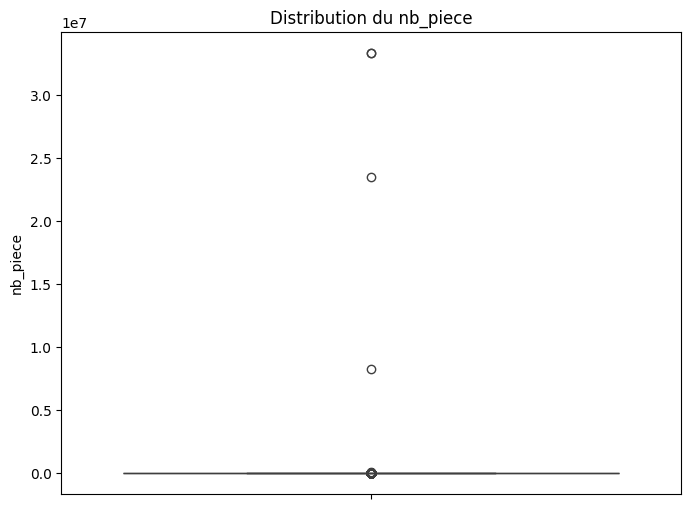

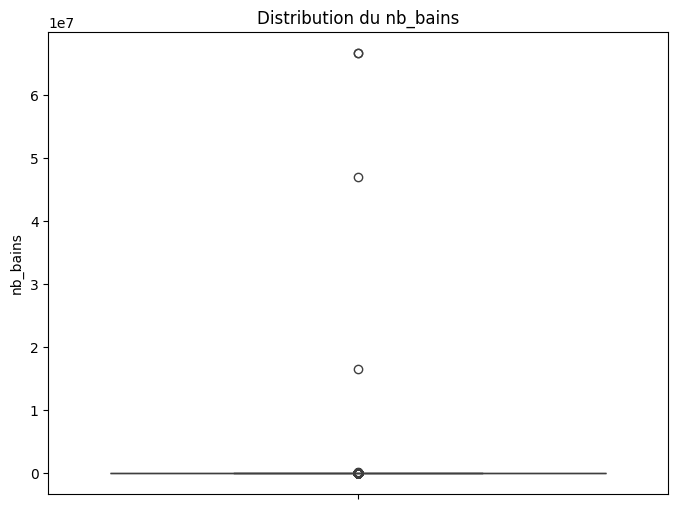

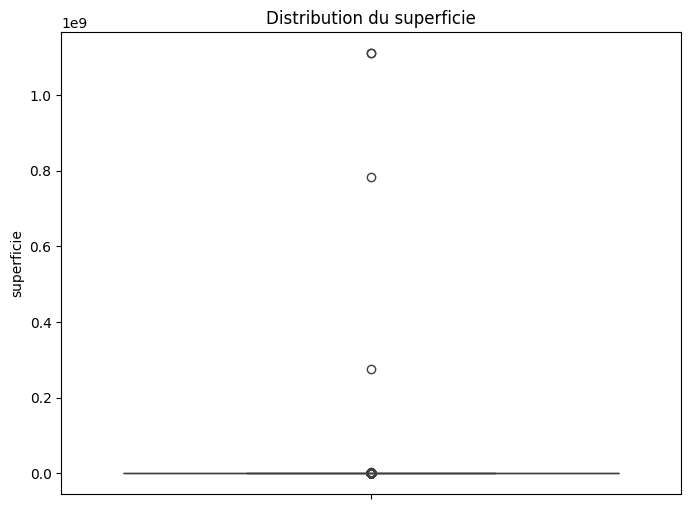

In [94]:
for col in val_num:
    plt.figure(figsize=(8,6))
    sns.boxplot(y=df[col])
    plt.title(f"Distribution du {col}")
    plt.ylabel(f"{col}")
    plt.show()

In [95]:
#gestion des valeurs abherrantes
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]


for col in val_num:
    df= remove_outliers(df, col)

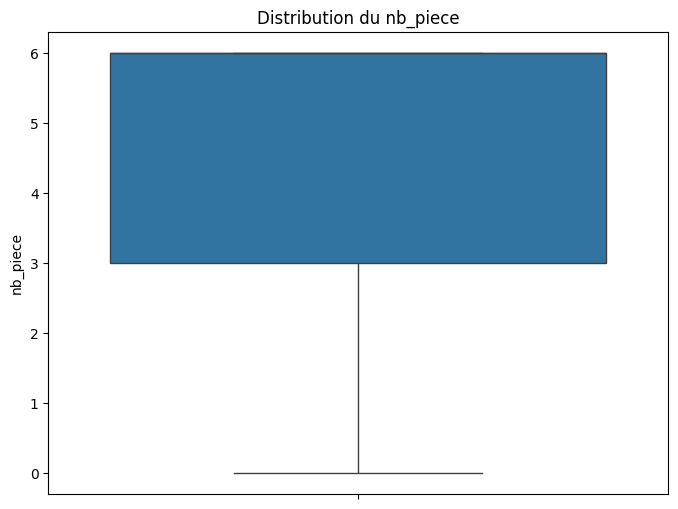

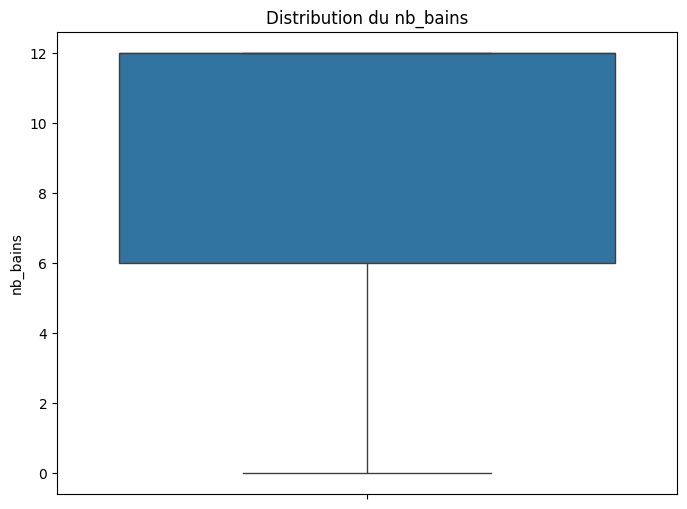

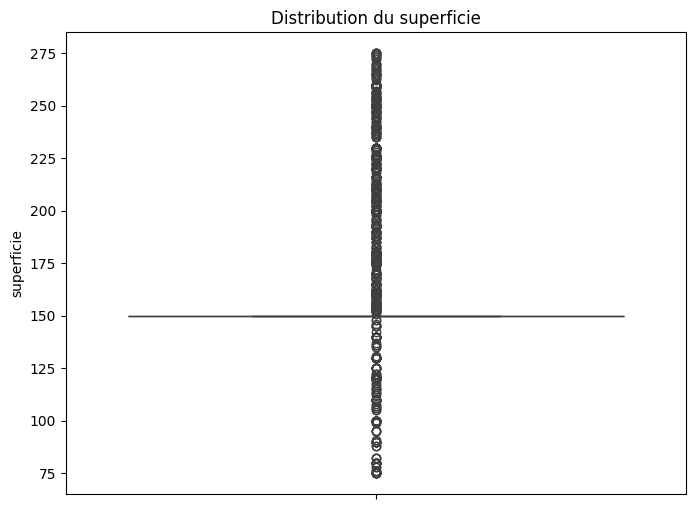

In [96]:
for col in val_num:
    plt.figure(figsize=(8,6))
    sns.boxplot(y=df[col])
    plt.title(f"Distribution du {col}")
    plt.ylabel(f"{col}")
    plt.show()

In [97]:
df.to_csv('villas_web_cleaned.csv', index=False)